In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage import data, color, io
from skimage.feature import Cascade

In [4]:
from skimage.io import imread

In [5]:
night_image = imread(
'/Users/juansantateresagomez/Desktop/Image_Processing/Image Processing with Python course exercise dataset/chapter 4/face_det3.jpg')

In [6]:
from skimage.util import img_as_float

In [7]:
night_image = img_as_float(night_image)

In [8]:
trained_file = data.lbp_frontal_face_cascade_filename()

In [9]:
trained_file

'/Users/juansantateresagomez/opt/anaconda3/lib/python3.7/site-packages/skimage/data/lbpcascade_frontalface_opencv.xml'

In [10]:
detector = Cascade(trained_file)

In [11]:
detected = detector.detect_multi_scale(
    img = night_image, 
    scale_factor = 1.2, 
    step_ratio = 1, 
    min_size=(10,10), 
    max_size=(200,200))





In [12]:
detected

[{'r': 774, 'c': 131, 'width': 40, 'height': 40}]

In [13]:
import matplotlib.patches as patches

In [14]:
def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

In [15]:
def show_detected_face(result, detected, title='Face Image'):
    
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    
    crop_face(result, detected)

        
        
        

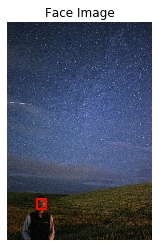

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


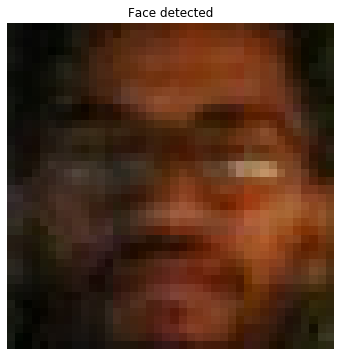

In [16]:
show_detected_face(night_image, detected)

Multiple faces

In [17]:
friends_image = imread(
    '/Users/juansantateresagomez/Desktop/Image_Processing/Image Processing with Python course exercise dataset/chapter 4/face_det_friends22.jpg')

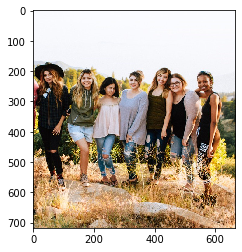

In [18]:
plt.imshow(friends_image)


In [19]:
trained_file_2 = data.lbp_frontal_face_cascade_filename()

In [20]:
detector_2 = Cascade(trained_file)

In [21]:
detected_2 = detector.detect_multi_scale(
    img = friends_image, 
    scale_factor = 1.2, 
    step_ratio = 1, 
    min_size=(10,10), 
    max_size=(200,200))


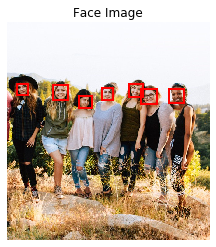

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


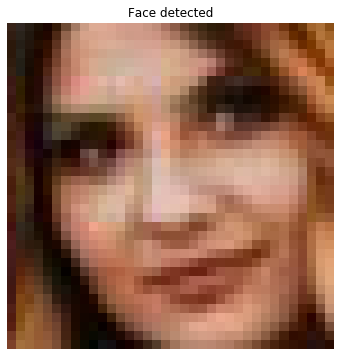

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


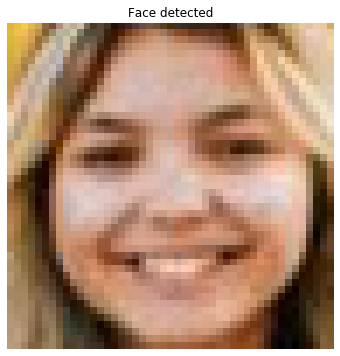

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


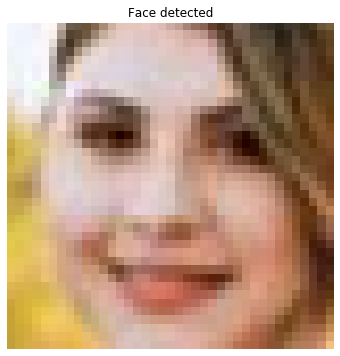

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


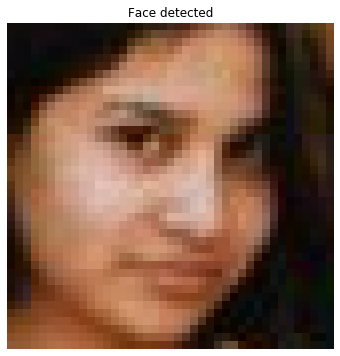

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


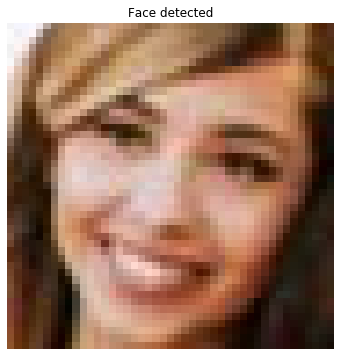

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


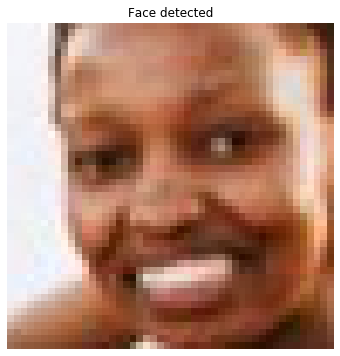

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


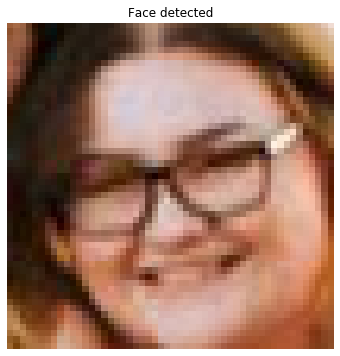

In [22]:
show_detected_face(friends_image, detected_2)

Segmentation and face detection

In [28]:
from skimage.segmentation import slic
from skimage.color import label2rgb

In [24]:
profile_image = imread(
'/Users/juansantateresagomez/Desktop/Image_Processing/Image Processing with Python course exercise dataset/chapter 4/face_det9.jpg')

In [26]:
segments = slic(profile_image, n_segments=100)

In [30]:
segmented_image = label2rgb(segments, profile_image, kind='avg')

In [35]:
detected_3 = detector.detect_multi_scale(
    img=segmented_image,
    scale_factor = 1.2,
    step_ratio = 1,
    min_size=(10,10), 
    max_size=(1000,1000))

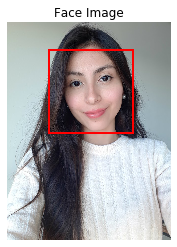

{'r': 110, 'c': 169, 'width': 340, 'height': 340}


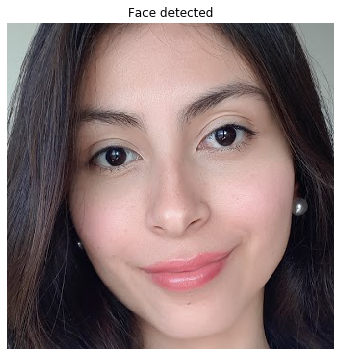

In [36]:
show_detected_face(profile_image, detected_3)

Privacy protection

In [38]:
group_image = imread(
'/Users/juansantateresagomez/Desktop/Image_Processing/Image Processing with Python course exercise dataset/chapter 4/face_det25.jpg')

In [39]:
detected_4 = detector.detect_multi_scale(
    img = group_image,
    scale_factor = 1.2,
    step_ratio = 1,
    min_size = (10,10),
    max_size = (100,100))

In [40]:
from skimage.filters import gaussian

In [51]:
def getFace(image, d):
    x, y = d['r'], d['c']
    width, height = d['r'] + d['width'], d['c'] + d['height']
    face = image[x:width, y:height]
    return face
    

In [54]:
for d in detected_4:
    face = getFace(group_image, d)

In [55]:
blurred_face = gaussian(face, multichannel=True, sigma=10)

In [56]:
def mergeBlurryFace(original, gaussian_image):
    x, y = d['r'], d['c']
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    original[x:width, y:height] = gaussian_image
    return original

In [57]:
resulting_image = mergeBlurryFace(group_image, blurred_face)

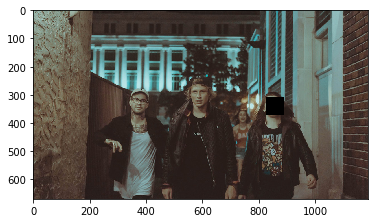

In [58]:
plt.imshow(resulting_image)